### Specifying neccessary imports 

In [0]:
'''Specifying the necessary imports'''
import pandas as pd
import numpy as np
import dask.dataframe as dask_data
#Dask data frames used to help in in-memory large computing on a single machine

#visualization specific imports 
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs

import sklearn
import matplotlib.dates as mdates



In [0]:
matplotlib.style.use('ggplot')

#A parse date variable to pass in the read_csv function later to take into account the date format 
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

### Data Loading stage 

In [0]:
''' LOADING stage 
    Reading the sampled train data
    Size : 1 million records
'''

train_data = pd.read_csv('avuzuclean.csv', parse_dates = ['hour'], date_parser = parse_date,
                        )



In [123]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 24 columns):
id                  2994 non-null uint64
click               2994 non-null int64
hour                2994 non-null datetime64[ns]
C1                  2994 non-null int64
banner_pos          2994 non-null int64
site_id             2994 non-null object
site_domain         2994 non-null object
site_category       2994 non-null object
app_id              2994 non-null object
app_domain          2994 non-null object
app_category        2994 non-null object
device_id           2994 non-null object
device_ip           2994 non-null object
device_model        2994 non-null object
device_type         2994 non-null int64
device_conn_type    2994 non-null int64
C14                 2994 non-null int64
C15                 2994 non-null int64
C16                 2994 non-null int64
C17                 2994 non-null int64
C18                 2994 non-null int64
C19                 2994 non-null 

## Memory Optimization

In [0]:
'''
Memory optimization at this point ~~ 183 megabytes 

Optimization technique ::: Alter data types from int64 to int32 to reduce block memory usage

Then RELOADING the data 
'''
data_types = {
    'id': np.str,
    'click': np.bool_,
    'hour': np.str,
    'C1': np.uint16,
    'banner_pos': np.uint16,
    'site_id': np.object,
    'site_domain': np.object,
    'site_category': np.object,
    'app_id': np.object,
    'app_domain': np.object,
    'app_category': np.object,
    'device_id': np.object,
    'device_ip': np.object,
    'device_model': np.object,
    'device_type': np.uint16,
    'device_conn_type': np.uint16,
    'C14': np.uint16,
    'C15': np.uint16,
    'C16': np.uint16,
    'C17': np.uint16,
    'C18': np.uint16,
    'C19': np.uint16,
    'C20': np.uint16,
    'C21': np.uint16
}

train_data = pd.read_csv('avuzuclean.csv', parse_dates = ['hour'],
                        date_parser = parse_date, 
                        dtype = data_types )




## A separate data frame where clicks = 1

In [0]:
train_data_clicks = train_data[train_data['click']==1]

In [126]:
train_data.info() 


## Memory consumption reduced to 107.8 + MB

'''
% reduction in memory usage = 40% 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 24 columns):
id                  2994 non-null object
click               2994 non-null bool
hour                2994 non-null datetime64[ns]
C1                  2994 non-null uint16
banner_pos          2994 non-null uint16
site_id             2994 non-null object
site_domain         2994 non-null object
site_category       2994 non-null object
app_id              2994 non-null object
app_domain          2994 non-null object
app_category        2994 non-null object
device_id           2994 non-null object
device_ip           2994 non-null object
device_model        2994 non-null object
device_type         2994 non-null uint16
device_conn_type    2994 non-null uint16
C14                 2994 non-null uint16
C15                 2994 non-null uint16
C16                 2994 non-null uint16
C17                 2994 non-null uint16
C18                 2994 non-null uint16
C19                 2994 n

'\n% reduction in memory usage = 40% \n'

# Part 1: Exploratory Data Analytics

In [89]:
train_data.describe() 

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,2994.000000,2994.000000,2994.000000,2994.000000,2994.00000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000
mean,1005.046092,0.180361,1.062124,0.200401,17585.96994,318.492986,57.531062,1949.729459,0.785571,122.671343,52874.735471,89.496994
std,1.068899,0.384552,0.592425,0.629957,3496.53980,8.967558,38.314460,422.603094,1.224586,231.257135,15226.928626,46.514577
min,1002.000000,0.000000,0.000000,0.000000,377.00000,216.000000,36.000000,112.000000,0.000000,35.000000,34464.000000,13.000000
25%,1005.000000,0.000000,1.000000,0.000000,15704.00000,320.000000,50.000000,1722.000000,0.000000,35.000000,34548.000000,61.000000
50%,1005.000000,0.000000,1.000000,0.000000,17653.00000,320.000000,50.000000,1955.000000,0.000000,35.000000,65535.000000,79.000000
75%,1005.000000,0.000000,1.000000,0.000000,20362.00000,320.000000,50.000000,2323.000000,2.000000,39.000000,65535.000000,157.000000
max,1010.000000,1.000000,5.000000,3.000000,21691.00000,320.000000,250.000000,2496.000000,3.000000,1835.000000,65535.000000,157.000000


In [90]:
train_data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,65535,79
1,10000169349117863715,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,34548,79
2,10000371904215119486,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,34548,79
3,10000640724480838376,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,34548,79
4,10000679056417042096,False,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,65535,157


In [91]:
train_data.iloc[:, :24].head(5)

'''
24 features encompassing site attributes, application features, device attributes 

Target features - click 
>>C14 - C21 - Anonymized categorical variables 

Features kept anonymous via. md5 hashing encrypton : 
  
>>Site features - Site_id, Site_domain, Site_category
>>App features - app_id, app_domain 
>>Device features - device_type, device_conn_type 

'''

'\n24 features encompassing site attributes, application features, device attributes \n\nTarget features - click \n>>C14 - C21 - Anonymized categorical variables \n\nFeatures kept anonymous via. md5 hashing encrypton : \n  \n>>Site features - Site_id, Site_domain, Site_category\n>>App features - app_id, app_domain \n>>Device features - device_type, device_conn_type \n\n'

### CTR analysis ~ Click v/s No click distribution

'\n'

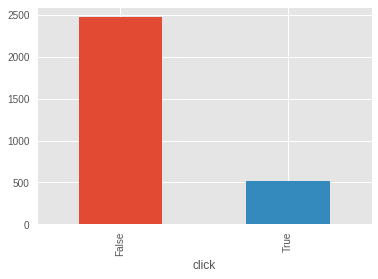

In [117]:
%matplotlib inline

train_data.groupby('click').size().plot(kind = 'bar')
rows = train_data.shape[0]

click_through_rate = train_data['click'].value_counts()/rows 

click_through_rate

'''
'''

### Click through rate on a set of 1 million records of click stream data sampled at random from the population of 40 million records is 16.9 ~ 17%. CTR effectively = 17% 


## Feature Engineering 

### Studying the relationships between different features and the target variable i.e 'Click'. Manipulating data in the process, introducing new metrics

### HOUR 

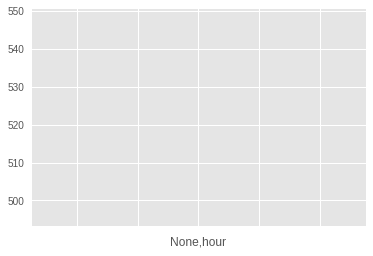

In [118]:
'''
Metric 1. HOUR 
'''

train_data.hour.describe() 


'''INSIGHT 2: Impressions V/S Clicks 
    MAXIMUM number of Impresisons around 1 P.M ~ 1561 '''

df_impressions = train_data.groupby('hour').agg({'click':'sum'})
#df_impressions
df_impressions.unstack().plot()

df_click = train_data[train_data['click']==1]
temp_click = df_click.groupby('hour').agg({'click' : 'sum'})
temp_click.unstack().plot()

#temp_click

In [119]:
train_data.hour.describe()

count                    2994
unique                      1
top       2014-10-21 00:00:00
freq                     2994
first     2014-10-21 00:00:00
last      2014-10-21 00:00:00
Name: hour, dtype: object

In [0]:
#Since Time Features are thought of in terms of cycles

# Creating Metrics From The Hour Field 

In [96]:
''' HOUR as a metric is difficult to read because it is a time stamp 
    Introducing new metrics: 
     1. hour_in_day - Better KPI to assess the impressions v/s clicks behavior w.r.t hour in day
     2. weekday -- To study user behavior w.r.t clicks on each day 
     3. Day_name -- To extract the day name from the HOUR feature for a better understanding 
'''

train_data['hour_in_day'] = train_data['hour'].apply(lambda val : val.hour)
train_data_clicks['hour_in_day'] = train_data_clicks['hour'].apply(lambda val : val.hour)

train_data['weekday'] = train_data['hour'].apply(lambda val: val.dayofweek)
train_data_clicks['weekday'] = train_data_clicks['hour'].apply(lambda val: val.dayofweek)

train_data['day_name'] = train_data['hour'].apply(lambda x: x.strftime('%A'))
train_data_clicks['day_name'] = train_data_clicks['hour'].apply(lambda x: x.strftime('%A'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

In [97]:
train_data.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_in_day',
       'weekday', 'day_name'],
      dtype='object')

### Hour In day, weekday and day_name columns added

##### Monday = 0, Sunday = 6

# HOUR IN DAY

In [98]:
train_data['hour_in_day'].nunique() 

1

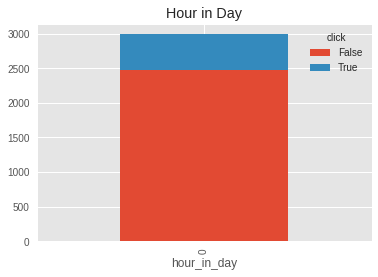

In [99]:
   
train_data.groupby(['hour_in_day', 'click']).size().unstack().plot(kind='bar', stacked=True, title="Hour in Day")


In [100]:
train_data[['hour','click']].groupby(['hour']).sum().sort_values('click',ascending=False)

,click
hour,
2014-10-21,522.0


In [101]:
train_data_clicks[['hour','click']].groupby(['hour']).sum().sort_values('click',ascending=False)

,click
hour,
2014-10-21,522.0


## Hour in day - CTR v/s impressions analysis 

In [0]:
hour_df = pd.DataFrame() 

#creating a new independendt data frame 

In [103]:
hour_df['hr'] = train_data_clicks[['hour_in_day','click']].groupby(['hour_in_day']).count().reset_index().sort_values('click',ascending=False)['hour_in_day']
                        
hour_df
#hour_dataframe.drop("hr", axis = 1, inplace = True)

#train_data_clicks.head()

,hr
0,0


### Hour in day - Clicks

In [104]:
'''
Taking into account just the CLICKS 
'''
hour_df['pos_clicks'] = train_data_clicks[['hour_in_day','click']].groupby(['hour_in_day']).count().reset_index().sort_values('click',ascending=False)['click']
            
hour_df

,hr,pos_clicks
0,0,522


### Hour in day - Impressions

In [105]:
'''
Taking into account the IMPRESSIONS
'''
hour_df['impressions_total'] = train_data[['hour_in_day','click']].groupby(['hour_in_day']).count().reset_index().sort_values('click',ascending=False)['click']
            
hour_df


,hr,pos_clicks,impressions_total
0,0,522,2994


### Introducing Click through rate

In [106]:
'''
Introducing a new feature click through rate 
'''

hour_df['click_through_rate'] = 100*hour_df['pos_clicks']/hour_df['impressions_total']

#hour_df.sort_values(ascending = False, by = 'impressions_total')
hour_df.sort_values(ascending = False, by = 'click_through_rate')


,hr,pos_clicks,impressions_total,click_through_rate
0,0,522,2994,17.43487


In [0]:
list_of_hours = hour_df.sort_values(by='click_through_rate',ascending=False)['hr'].tolist()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



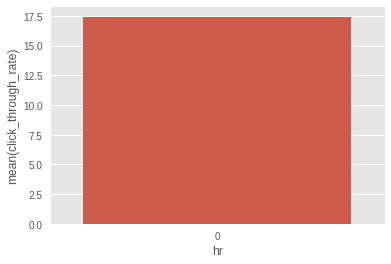

In [108]:
import seaborn as sns
sns.barplot(y='click_through_rate',x='hr'\
            ,data=hour_df\
            ,order=list_of_hours)

# Weekday ~ day_name

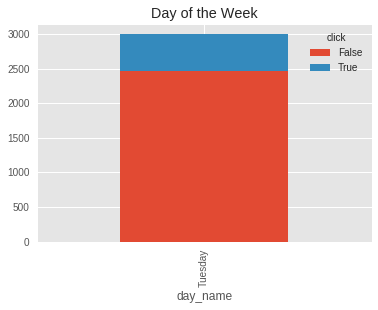

In [109]:
train_data.groupby(['day_name','click']).size().unstack().plot(kind='bar', stacked=True, title="Day of the Week")

# weekday ~ day_name (for clicks)

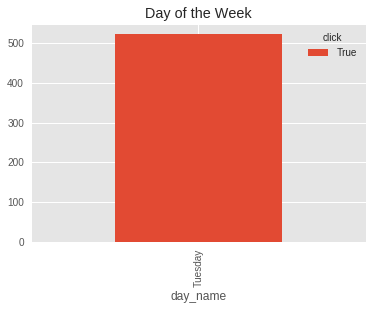

In [110]:
train_data_clicks.groupby(['day_name','click']).size().unstack().plot(kind='bar', stacked=True, title="Day of the Week")

In [111]:
train_data_clicks[['day_name','click']].groupby(['day_name']).count().sort_values('click',ascending=False)

,click
day_name,
Tuesday,522


### Most clicks on Tuesday, then wednesday followed by Thursday

# Day wise analysis of click through rates 

In [0]:
day_df = pd.DataFrame()

In [113]:
day_df['day'] = train_data_clicks[['day_name','click']].groupby(['day_name']).count().reset_index().sort_values('click',ascending=False)['day_name']
day_df           

,day
0,Tuesday


### Day-wise clicks

In [114]:
day_df['pos_clicks'] = train_data_clicks[['day_name','click']]\
                        .groupby(['day_name']).count()\
                        .reset_index()\
                        .sort_values('click',ascending=False)['click']
day_df

,day,pos_clicks
0,Tuesday,522


### Day-wise Impressions

In [115]:
day_df['total_impressions'] = train_data[['day_name','click']].groupby(['day_name']).count().reset_index().sort_values('click',ascending=False)['click']
day_df

,day,pos_clicks,total_impressions
0,Tuesday,522,2994


### Day-wise Click Percentages 

In [116]:
day_df['click_pct'] = 100*day_df['pos_clicks']/day_df['total_impressions']
day_df.sort_values(ascending = False, by = 'click_pct')

,day,pos_clicks,total_impressions,click_pct
0,Tuesday,522,2994,17.43487


### Sunday has the highest value of click through rate 

In [0]:
list_of_days = day_df.sort_values(by='click_pct',ascending=False)['day'].tolist()

In [0]:
sns.barplot(y='click_pct',x='day'\
            ,data=day_df\
            ,order=list_of_days)

# Banner Position

### Banner positions representing attractive and appealing designs that might highly affect a user's behavior and in turn trigger their decision to click. Or not. Hence making it an effective metric to predict clicks

In [0]:
train_data['banner_pos'].unique()

#### It's unclear as to what the 7 banner positions (represented as integers) represent. Intuitively and based on research, the 7 positions might represent ad placing in a 2D webpage  

In [0]:
banner_temp =train_data[['banner_pos','click']].groupby(['banner_pos','click'])

banner_temp.size().unstack().plot(kind='bar',stacked=True, title='banner positions')

#### Positions 0 and 1 ~ the most prominent banner positions garnering most impressions 

In [0]:
train_data[['banner_pos','click']].groupby(['banner_pos']).count().sort_values('click',ascending=False)

### BANNER POSITIONS 0 and 1 generating most impressions and clicks

In [0]:
banner_temp =train_data_clicks[['banner_pos','click']].groupby(['banner_pos','click'])

banner_temp.size().unstack().plot(kind='bar',stacked=True, title='banner positions')

In [0]:
train_data_clicks[['banner_pos','click']].groupby(['banner_pos']).count().sort_values('click',ascending=False)

## CTR analysis on Banner position 


In [0]:
import pandas as pd 

banner_df = pd.DataFrame()

In [0]:
banner_df['position'] = train_data_clicks[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['banner_pos']

In [0]:
banner_df['pos_clicks'] = train_data_clicks[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['click']

In [0]:
banner_df['total_impressions'] = train_data[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['click']

In [0]:
banner_df['click_pct'] = 100*banner_df['pos_clicks']/banner_df['total_impressions']

banner_df

In [0]:
banner_df.sort_values(ascending=False,by='click_pct')

#### Banner 7 has the highest click through rate 

In [0]:
list_of_banners = banner_df.sort_values(by='click_pct',ascending=False)['position'].tolist()

In [0]:
sns.barplot(y='click_pct',x='position'\
            ,data=banner_df\
            ,order=list_of_banners)

#### Banner position 7 seems to be a nice choice for placing advertisements. As per click through rate. 

# DEVICE TYPE Metrics

In [0]:
device_temp = train_data[['device_type','click']].groupby(['device_type','click'])

device_temp.size().unstack().plot(kind='bar',stacked=True, title='device types')


### Device type 1 getting most impressions among the 5 devices

In [0]:
train_data[['device_type','click']].groupby(['device_type']).count().sort_values('click',ascending=False)

In [0]:
train_data_clicks[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar',stacked=True, title='device types')

In [0]:
train_data_clicks[['device_type','click']].groupby(['device_type']).count().sort_values('click',ascending=False)

### Device Type 1 gets the maximum number of clicks too

In [0]:
device1_df = train_data_clicks[train_data_clicks['device_type']==1]

# extract CLICKS for DEVICE TYPE 1 

### Hourly distribution of clicks on Device 1

In [0]:
temp_device_df = device1_df.groupby(['hour_in_day', 'click'])

temp_device_df.size().unstack().plot(kind='bar', stacked=True, title="Clicks spread across hour in day for Device 1")

#### Device type 1 --- probably cell phone// Desktop Reasons --- Businesses might not prefer showing ads later in the evening----- after work hours// business hours ( Click spread max between 9 to 5 ) 



## Click through rate analysis w.r.t Device type(merging data frames)


### Had to merge data frames to ensure consistency

In [0]:
import pandas as pd
dev_type_df=pd.DataFrame()

dev_type_df_total_imp = pd.DataFrame()

In [0]:
#TOTAL CLICKS 

dev_type_df = train_data_clicks.groupby('device_type').agg({'click':'sum'}).reset_index()

dev_type_df

In [0]:
#TOTAL IMPRESSIONS 

dev_type_df_total_imp = train_data.groupby('device_type').agg({'click':'count'}).reset_index()

In [0]:
#dev_type_df_total_imp.drop([2], inplace = True)

dev_type_df_total_imp

In [0]:
dev_type_df['total_impressions'] = dev_type_df_total_imp['click']

dev_type_df

In [0]:
## sucess percentage == CTR 

dev_type_df['success_pct'] = (dev_type_df['click']/dev_type_df['total_impressions'])*100

dev_type_df

In [0]:
dev_type_df_total_imp.columns = ['device_type', 'click2']

merged_df = pd.merge(left = dev_type_df , right = dev_type_df_total_imp,
                    how = 'inner', on = 'device_type')



In [0]:
merged_df

#del merged_df['total_impressions']

merged_df.columns = ['device_type', 'click','success_pct',
                    'total_impressions']
merged_df

In [0]:
merged_df['success_pct'] = 100*(merged_df['click']/merged_df['total_impressions'])

merged_df

### Device Type 0 with the highest click through rate

## App Related Metrics

#### App_Id, App_Domain, App_Category

In [0]:
app_features = ['app_id', 'app_domain', 'app_category']

In [0]:
train_data.groupby('app_category').agg({'click':'sum'}).sort_values(by='click',ascending = False)


In [0]:
train_data['app_category'].value_counts().plot(kind='bar', title='App Category v/s Clicks')


### Studying Clicks behavior across different app categories

In [0]:
train_app_category = train_data.groupby(['app_category', 'click']).size().unstack()


In [0]:

train_app_category.div(train_app_category.sum(axis=1), axis=0).plot(kind='bar', stacked=True, title="Intra-category CTR")

## C1, C14-C21 features

In [0]:

features = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18',
            'C20', 'C21']

train_data[features].astype('object').describe()



In [0]:
train_data.groupby(['C1', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')
train_data.groupby(['C15', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')
train_data.groupby(['C16', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')
train_data.groupby(['C18', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')


# Part 2: Developing the Prediction model

### Using the key metrics discussed above as a part of the EDA to put together a predictive model in order to forecast the possibility of a click

### Data preparation stage ~~ To be fed in the data pipeline 

In [0]:
model_features = ['weekday', 'hour_in_day',
                  'banner_pos', 'site_category',
                  'device_conn_type', 'app_category',
                  'device_type']

In [0]:
model_target = 'click'

In [0]:
train_model = train_data[model_features+[model_target]].sample(frac=0.1,random_state=42)

#### Clubbing the model features with the target and selecting a fraction in order to speeden up computation

In [0]:
def one_hot_features(data_frame, feature_set):
    new_data_frame = pd.get_dummies(data_frame,
                                     columns = feature_set,
                                    sparse = True)

    return new_data_frame

#### Features Site_category and App_category are hashed and need to be represented in a readable format

#### Banner_pos is represented as integers hence we make use of one hot encoding to deal with all these features

In [0]:
train_model = one_hot_features(train_model,
                                ['site_category',
                                 'app_category',
                                 'banner_pos'])


In [0]:
train_data.head()

### Extracting all columns from the train model except the target mask column 

In [0]:
model_features = np.array(train_model.columns[train_model.columns!=model_target].tolist())

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    train_model[model_features].values,
    train_model[model_target].values,
    test_size=0.25,
    random_state=42
)


### Feature Selection ~ To reduce the dimensional space occupied and to deal with overfitting, use GRID SEARCH cross validation and regularization to obtain trade off b/w number of features and F-1 score

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score


### F1 score used as a performance metric because it represents the harmonic mean between precision and recall 

In [0]:
num_splits = 3
c_values = np.logspace(-3,0,7)


In [0]:
stratified_k_fold = StratifiedKFold(n_splits=num_splits)

scores = np.zeros(7)
nr_params = np.zeros(7)


### Model: logistic Regression with L1 regularization and balanced class weights

In [0]:
for train_data, valid_data in stratified_k_fold.split(x_train,
                                                      y_train):
    for i, c in enumerate(np.logspace(-3, 0, 7)):
        lr_classify = LogisticRegression(penalty='l1',
                                         class_weight='balanced',
                                         C = c)
        lr_classify.fit(x_train[train_data],
                        y_train[train_data])

        #validation_Set evaluation

        y_prediction = lr_classify.predict(x_train[valid_data])
        score_f1 = f1_score(y_train[valid_data],
                            y_prediction, average='weighted' )

        scores[i] += score_f1 / num_splits

        ### spot the selected parameters ##

        model_selected = SelectFromModel(lr_classify, prefit=True)
        nr_params[i] += np.sum(model_selected.get_support()) / num_splits



In [0]:
plt.figure(figsize=(20, 10))
plt.plot(nr_params, scores)

for i, c in enumerate(c_values):
    plt.annotate(c, (nr_params[i], scores[i]))
plt.xlabel("Nr of parameters")
plt.ylabel("Avg F1 score")


### Parameters obtained using c = 0.1 manage to reduce parameters dimension which optimizes the execution time also improving generalization capacity. 


In [0]:
lr_classify = LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [0]:
lr_classify.fit(x_train, y_train)


In [0]:
model_selected = SelectFromModel(lr_classify,
                                 prefit=True )

In [0]:
#pruned_params = model_selected.get_support()
pruned_params

In [0]:
model_features = model_features[pruned_params]

x_train = x_train[:, pruned_params]

x_test = x_test[:, pruned_params]


## Model : Gradient Boosting

### Part 3: Evaluating results using various performance metrics

In [0]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


In [0]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train,
    y_train,
    stratify=y_train,
    test_size=0.1,
    random_state=42)

In [0]:
model = XGBClassifier()
xgb_clf = model

### Log Loss values measuring the performances of a classification models where the prediction label is a value between 0 and 1. The goal of the model is to minmize this value

In [0]:
xgb_clf.fit(x_train, y_train, early_stopping_rounds=10,
            eval_metric="logloss", eval_set=[(x_valid, y_valid)])

In [0]:
y_pred = xgb_clf.predict(x_test)
predictions = [round(value) for value in y_pred]

In [0]:
print(classification_report(y_test,
                            predictions))

### Other evaluation metrics: Accuracy score, Confusion Matrix, ROC/AUC score

In [0]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.roc_auc_score(y_test, predictions))


### The model has an 83% accuracy score and 0.5 is the area under the receiver operating characteristic curve. ROCAUC implying the expected position of positives drawn  before a uniformly drawn random negative

## Saving the XGBoost and Logistic models

In [0]:
import pickle
filename = 'xgb_mod.sav'
filename2 = 'logistic.sav'
pickle.dump(xgb_clf,open(filename, 'wb' ))
pickle.dump(lr_classify, open(filename2, 'wb'))
